# ALGORITHMIC TRADING(STATE BANK OF INDIA)
AUTHOR :SHUBHAM GONDRALWAR

DATE WRITTEN: 07-06-2020

The project is adressed with the aim of predicting the escorts ltd stock open price with the help of machine learning model which helps regular investors to assess their risks and avoid loss situations.


Model building starts with extracting data of stock markets of different countries which enables us to find the STATE BANK'S trading day open price(Open price refers to the price when the trading starts on particular day).

Next step is to load the dataset extracted from yahoo finance using pandas and extracting meaningful insights by visualisation using seaborn and matplotlib.

Feature engineering and Feature selection are the most useful techniques used in order to make data meaningful for the machine learning model followed by Hyperparameter tuning.

The model is finalised based on the perfomance of the model in the data used for testing and LIVE DATA AS WELL.

In order to make it usable for the end user the web application is  made using python(Flask) as an API where the user needs to input the required data in order to get the stock open price of STATE BANK OF INDIA.

# LET'S GET STARTED

In [258]:
# WE WILL START BY IMPORTING ALL THE LIBRARIES REQUIRED FOR MODEL BUILDING.
import numpy as np # for numerical operation if any
import pandas as pd # mainly used for loading dataset and to handle dataframe operations
import matplotlib.pyplot as plt # for visulaisation
import seaborn as sns # for visulisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import math
import datetime
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets.

In [259]:
sbi = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/SBI/sbi test.csv")
sbi.head()

,Date,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose
0,03-01-2011,283.269989,134.789627,2808.076904,4745.200195,22436.20000,10398.09961,6134.500000,2652.870117
1,04-01-2011,283.440002,135.278580,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020
2,05-01-2011,273.500000,131.132156,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000
3,06-01-2011,271.399994,129.099701,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951
4,07-01-2011,261.790009,125.705864,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893


In [260]:
hongkong = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/hongkong.csv")#hangseng market index
hongkong.head()

,Date,hangopen
0,03-01-2011,23135.64063
1,04-01-2011,23477.31055
2,05-01-2011,23650.17969
3,06-01-2011,23861.22070
4,07-01-2011,23744.02930


In [261]:
austrilia = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/australia.csv")#austrilia markey index
austrilia.head()
#austrilia.shape

,Date,austopen
0,31-12-2010,4787.500000
1,04-01-2011,4758.299805
2,05-01-2011,4738.600098
3,06-01-2011,4717.700195
4,07-01-2011,4717.799805


In [262]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#Japan's Nikkei 225 Stock Average.
nikkie.head()
#nikkie.shape#Japan's Nikkei 225 Stock Average dataset countains 2321 rows & 2 featurs.

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [263]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#japan index
nikkie.head()
#nikkie.shape

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [264]:
sanghai = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/sanghai.csv")#china market index
sanghai.head()
#sanghai.shape

,Date,sangaiopen
0,31-12-2010,2759.162109
1,04-01-2011,2825.329102
2,05-01-2011,2833.115967
3,06-01-2011,2838.435059
4,07-01-2011,2820.665039


In [265]:
nifty = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nifty50.csv")#niftyopen
nifty.head()
nifty.shape

(2316, 2)

In [266]:
df1 = pd.merge(sbi,hongkong,how = "inner",on = "Date")
df2 = pd.merge(df1,austrilia,how = "inner",on = "Date")
df3 = pd.merge(df2,nifty,how = "inner",on = "Date")
df4 = pd.merge(df3,nikkie,how = "inner",on = "Date")
df5 = pd.merge(df4,sanghai,how = "inner",on = "Date")

In [267]:
sbi_main = df5 #changing the variable name

In [268]:
sbi_main.head()

,Date,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,04-01-2011,283.440002,135.278580,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102
1,05-01-2011,273.500000,131.132156,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967
2,06-01-2011,271.399994,129.099701,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059
3,07-01-2011,261.790009,125.705864,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039
4,11-01-2011,254.625000,122.096336,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074


In [269]:
sbi_main.tail()# checking the tail

,Date,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
1954,23-03-2020,190.000000,209.850006,2870.342041,6690.600098,22805.07031,17011.52930,8745.450195,6879.520020,21696.13086,4753.899902,7945.700195,16570.57031,2677.590088
1955,24-03-2020,190.949997,181.600006,2868.458984,6733.500000,21696.13086,16726.55078,7610.250000,6860.669922,22497.57031,4546.000000,7848.299805,17206.88086,2703.019043
1956,25-03-2020,178.000000,183.199997,2875.417969,6735.700195,22663.49023,16552.83008,7801.049805,7417.859863,23255.91016,4735.700195,7735.149902,18446.80078,2775.302979
1957,26-03-2020,191.550003,189.899994,2898.575928,6826.399902,23527.18945,16887.77930,8317.849609,7384.299805,23604.83008,4998.100098,8451.000000,19234.76953,2761.895996
1958,27-03-2020,NaN,192.750000,2883.738037,6817.600098,23352.33984,18092.34961,8641.450195,7797.540039,23768.41016,5113.299805,8949.099609,19021.97070,2792.983887


In [270]:
##Lets check the shape.
sbi_main.shape#After adding all  features in our Dataset, we get 1959 rows & 14 featurs. 

(1959, 14)

In [271]:
sbi_main.info()# checking the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1958
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1959 non-null   object 
 1   SBIOpen        1958 non-null   float64
 2   SBIAdj Close   1953 non-null   float64
 3   sangaiclose    1958 non-null   float64
 4   aust close     1954 non-null   float64
 5   hangsangclose  1953 non-null   float64
 6   nkkiesclose    1945 non-null   float64
 7   nifty50 close  1944 non-null   float64
 8   usclose        1959 non-null   float64
 9   hangopen       1955 non-null   float64
 10  austopen       1955 non-null   float64
 11  niftyopen      1951 non-null   float64
 12  nikkiesopen    1944 non-null   float64
 13  sangaiopen     1958 non-null   float64
dtypes: float64(13), object(1)
memory usage: 229.6+ KB


The ESCORTS_MAIN NAMED IS THE FINAL DATASET FOR WHICH ANALYSIS NEEDS TO BE DONE WHICH HAS 1959 ROWS AND 14 COLUMNS FROM WHICH STOCKOPEN IS THE DEPENDENT VARIABLE AND REMAINING ARE INDEPEDENT VARIABLE.
ALSO IT CAN BE CLEARLY SEEN THAT DATE IS OBJECT DATATYPE AND REMAINING ARE FLOAT TYPE SO DATE MUST BE CONVERTED TO DATETIME VARIABLE.

CONVERTING DATE OBJECT TO DATETIME VARIABLE FOLLOWED BY SPLITTING THEM INTO DAY MONTH AND YEAR AS MACHINE LEARNING MODEL CANNIT LEARN OBJECT DATATYE.

In [272]:
#converting to datetime variable.
sbi_main["Date"] = pd.to_datetime(sbi_main["Date"])#converted to datetime variable
sbi_main["month"] = sbi_main["Date"].dt.month
sbi_main["day"] = sbi_main["Date"].dt.day
sbi_main["year"] = sbi_main["Date"].dt.year

In [273]:
sbi_main.head()#checking head of escots dataset.

,Date,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
0,2011-04-01,283.440002,135.278580,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102,4,1,2011
1,2011-05-01,273.500000,131.132156,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967,5,1,2011
2,2011-06-01,271.399994,129.099701,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059,6,1,2011
3,2011-07-01,261.790009,125.705864,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039,7,1,2011
4,2011-11-01,254.625000,122.096336,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074,11,1,2011


In [274]:
sbi_main.columns#checking columns name in final dataset.

Index(['Date', 'SBIOpen', 'SBIAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')

# ANALYSING MISSING VALUES:

In [118]:
#checking missing values.
sbi_main.isnull().sum()

Date              0
SBIOpen           1
SBIAdj Close      6
sangaiclose       1
aust close        5
hangsangclose     6
nkkiesclose      14
nifty50 close    15
usclose           0
hangopen          4
austopen          4
niftyopen         8
nikkiesopen      15
sangaiopen        1
month             0
day               0
year              0
dtype: int64

In [119]:
sbi_main.columns

Index(['Date', 'SBIOpen', 'SBIAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')

# Missing value treatment using feature engine.

In [275]:
imputer = mdi.MeanMedianImputer(imputation_method='median')

In [276]:
imputer.fit(sbi_main)

MeanMedianImputer(imputation_method='median',
                  variables=['SBIOpen', 'SBIAdj Close', 'sangaiclose',
                             'aust close', 'hangsangclose', 'nkkiesclose',
                             'nifty50 close', 'usclose', 'hangopen', 'austopen',
                             'niftyopen', 'nikkiesopen', 'sangaiopen', 'month',
                             'day', 'year'])

# The median values for all the features are given below.

In [277]:
imputer.imputer_dict_

{'SBIOpen': 254.25,
 'SBIAdj Close': 244.74298100000001,
 'sangaiclose': 2866.9239505,
 'aust close': 5423.5,
 'hangsangclose': 23422.51953,
 'nkkiesclose': 17210.05078,
 'nifty50 close': 8130.0,
 'usclose': 4862.569824,
 'hangopen': 23406.99023,
 'austopen': 5431.299805,
 'niftyopen': 8134.350098000001,
 'nikkiesopen': 17154.570314999997,
 'sangaiopen': 2854.325073,
 'month': 7.0,
 'day': 16.0,
 'year': 2015.0}

In [278]:
sbi_main = imputer.transform(sbi_main)
sbi_main.columns

Index(['Date', 'SBIOpen', 'SBIAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')

In [279]:
# checking missing values after filling.
sbi_main.isnull().sum()

Date             0
SBIOpen          0
SBIAdj Close     0
sangaiclose      0
aust close       0
hangsangclose    0
nkkiesclose      0
nifty50 close    0
usclose          0
hangopen         0
austopen         0
niftyopen        0
nikkiesopen      0
sangaiopen       0
month            0
day              0
year             0
dtype: int64

# Five point statistical summary to get the general insight of the data.

In [125]:
sbi_main.describe().T #checking staticstical result of each feature. 

,count,mean,std,min,25%,50%,75%,max
SBIOpen,1959.0,249.513586,48.359044,147.000000,213.564995,254.250000,284.000000,371.950012
SBIAdj Close,1959.0,221.407007,72.888827,86.890831,145.810929,244.742981,280.225006,372.399994
sangaiclose,1959.0,2804.002373,543.623881,1950.011963,2318.767578,2866.923951,3137.102417,5166.350098
aust close,1959.0,5382.026543,684.173622,3863.899902,4943.250000,5423.500000,5842.199951,6864.000000
hangsangclose,1959.0,24135.903289,3249.934644,16250.269530,21882.315430,23422.519530,26715.884765,33154.121090
nkkiesclose,1959.0,16650.755545,4794.100487,8160.009766,13385.875000,17210.050780,20659.785155,24270.619140
nifty50 close,1959.0,8131.170092,2213.182738,4544.200195,5899.675049,8130.000000,10213.274905,12362.299810
usclose,1959.0,5112.634385,1862.035934,2341.840088,3324.775024,4862.569824,6803.064942,9817.179688
hangopen,1959.0,24143.795518,3271.920917,17634.419920,21894.229490,23406.990230,26771.230470,33335.480470
austopen,1959.0,5402.051758,707.957968,3890.199951,4932.050049,5431.299805,5861.949951,7144.600098


# Outlier Analysis:

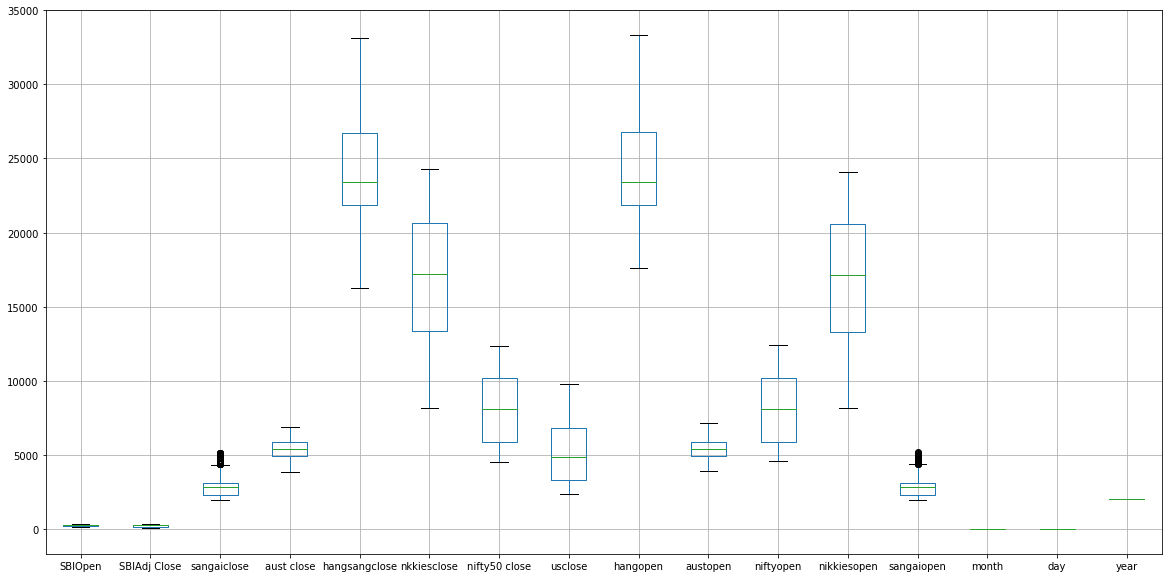

In [280]:
sbi_main.boxplot(figsize=(20,10)) #checking outlier

In [281]:
#HENCE THE ABOVE PLOT SHOWS THAT SANGAICLOSE & SANGAIOPEN  FEATURE HAVING OUTLIER. SO WE HAVE TO TREAT THEM.

In [282]:
sbi_main = sbi_main.drop(["Date"],axis = 1)

# AS IT CAN BE CLEARLY SEEN THAT OUTLIERS ARE PRESENT IN SOME FEATURES, SINCE LINEAR MODELS ARE SUSEPTABLE TO OUTLIERS WHICH CAN HAVE NEGATIVE IMPACT ON FINDING BEST FIT LINE SO IT IS ALWAYS BETTER TO REMOVE OUTLIERS.

In [284]:
def outlierhandle(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [285]:
for column in sbi_main.columns:
    lr,ur=outlierhandle(sbi_main[column])
    sbi_main[column]=np.where(sbi_main[column]>ur,ur,sbi_main[column])
    sbi_main[column]=np.where(sbi_main[column]<lr,lr,sbi_main[column])

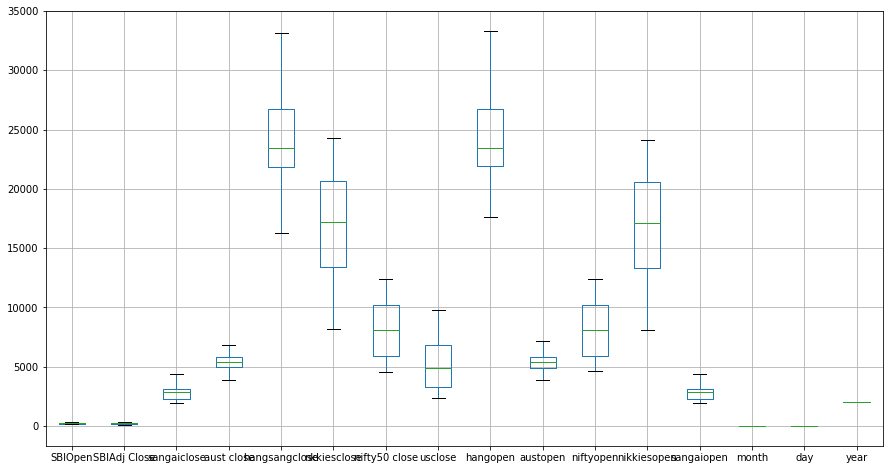

In [286]:
sbi_main.boxplot(figsize=(15,8))# After treating outlier.

In [287]:
sbi_main.head()

,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
0,283.440002,135.278580,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102,4.0,1.0,2011.0
1,273.500000,131.132156,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967,5.0,1.0,2011.0
2,271.399994,129.099701,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059,6.0,1.0,2011.0
3,261.790009,125.705864,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039,7.0,1.0,2011.0
4,254.625000,122.096336,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074,11.0,1.0,2011.0


In [288]:
sbi_main.columns

Index(['SBIOpen', 'SBIAdj Close', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day', 'year'],
      dtype='object')

 LETS DRAW SCATTERPLOT TO SEE THE RELEATIONSHIPS BETWEEN INDEPENDENT AND DEPENDENT VARIABLES.

In [289]:
#sns.pairplot(sbi_main,diag_kind='kde')

# FEATURE SELECTION AND MODEL BUILDING

LINEAR MODEL WILL BE BUILD FIRST AS MOST OF THE FEATURES ARE LINEARLY CORRELATED.

In [300]:
correlation = sbi_main.corr() # checking the missing values.
correlation

,SBIOpen,SBIAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
SBIOpen,1.000000,0.862280,0.568870,0.659622,0.720396,0.655148,0.769046,0.687082,0.725113,0.701454,0.771607,0.653091,0.553191,0.009851,-0.017068,0.623221
SBIAdj Close,0.862280,1.000000,0.602733,0.844806,0.757759,0.894253,0.925670,0.867107,0.758015,0.867647,0.923787,0.891838,0.589843,0.058156,-0.005644,0.858777
sangaiclose,0.568870,0.602733,1.000000,0.457233,0.477039,0.593489,0.522358,0.450547,0.475990,0.460020,0.524630,0.590949,0.936966,-0.051148,-0.013473,0.474495
aust close,0.659622,0.844806,0.457233,1.000000,0.778563,0.908585,0.900108,0.914102,0.780474,0.945352,0.902137,0.908733,0.461348,0.016846,-0.007647,0.891087
hangsangclose,0.720396,0.757759,0.477039,0.778563,1.000000,0.791346,0.821044,0.802716,0.988571,0.810904,0.823448,0.789236,0.505453,-0.038251,-0.026048,0.730449
nkkiesclose,0.655148,0.894253,0.593489,0.908585,0.791346,1.000000,0.926501,0.923849,0.791231,0.911908,0.929353,0.987083,0.608180,0.042434,-0.010678,0.921728
nifty50 close,0.769046,0.925670,0.522358,0.900108,0.821044,0.926501,1.000000,0.974355,0.821063,0.919701,0.993561,0.927866,0.527534,0.034309,-0.009943,0.952186
usclose,0.687082,0.867107,0.450547,0.914102,0.802716,0.923849,0.974355,1.000000,0.802868,0.920281,0.975657,0.925328,0.473383,0.027152,-0.008286,0.971908
hangopen,0.725113,0.758015,0.475990,0.780474,0.988571,0.791231,0.821063,0.802868,1.000000,0.812793,0.823180,0.793164,0.516334,-0.040702,-0.026783,0.726710
austopen,0.701454,0.867647,0.460020,0.945352,0.810904,0.911908,0.919701,0.920281,0.812793,1.000000,0.922703,0.913831,0.460732,-0.002274,-0.014583,0.887839


In [301]:
cortarget = abs(correlation["SBIOpen"])
features = cortarget[cortarget>0.7]
features

SBIOpen          1.000000
SBIAdj Close     0.862280
hangsangclose    0.720396
nifty50 close    0.769046
hangopen         0.725113
austopen         0.701454
niftyopen        0.771607
Name: SBIOpen, dtype: float64

To avoid the problem of multicolinearity droping highely correlated independent features is better while bulding the model.

In [302]:
X=sbi_main.drop(['SBIOpen','sangaiopen','sangaiclose','nikkiesopen','hangopen','niftyopen','austopen','day','month','year'] , axis=1)

In [303]:
X.columns

Index(['SBIAdj Close', 'aust close', 'hangsangclose', 'nkkiesclose',
       'nifty50 close', 'usclose'],
      dtype='object')

# Building Linear Regression
 spliting the data set into train & test.

In [304]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state =20)

# Finding the best hyperparameters using Grid search CV

In [305]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_cv = GridSearchCV(model,parameters, cv=10)
grid_cv.fit(X_train, y_train)
print("r2 / variance : ", grid_cv.best_score_)
print("bestparameters : ", grid_cv.best_params_)


r2 / variance :  0.8520955729425219
bestparameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [306]:
model = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)

# Fitting the model with best hyperparameters

In [307]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [308]:
X_test

,SBIAdj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose
1387,305.250000,5774.000000,27757.08984,19393.130860,10066.400390,6351.560059
714,259.142548,5420.399902,23319.16992,15115.799810,7402.250000,4125.810059
879,272.072418,5858.200195,24468.89063,19285.630860,8633.150391,4924.700195
957,264.160034,5632.700195,24497.98047,20664.439450,8589.799805,5146.410156
1118,185.366898,5004.500000,19719.28906,16757.349610,7887.799805,4809.879883
...,...,...,...,...,...,...
1710,300.399994,5928.200195,26755.63086,19561.960940,10737.599610,6905.919922
300,144.175018,4042.199951,19416.66992,8824.070313,5054.750000,2831.020020
867,285.499695,5569.500000,24887.43945,18665.109380,8767.250000,4635.240234
723,255.172318,5479.700195,23221.51953,15369.969730,7558.200195,4234.080078


In [309]:
y_pred = model.predict(X_test)

In [311]:
prediction =model.predict(X_train)

In [312]:
yhat = model.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.8582844517665689 0.8577393919656711


In [313]:
y_pred = model.predict(X_test)

In [314]:
X_test["predictedstock"] = y_pred

In [315]:
X_test["actualstock"] = y_test

In [316]:
X_test

,SBIAdj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,predictedstock,actualstock
1387,305.250000,5774.000000,27757.08984,19393.130860,10066.400390,6351.560059,318.981320,305.799988
714,259.142548,5420.399902,23319.16992,15115.799810,7402.250000,4125.810059,288.363094,268.450012
879,272.072418,5858.200195,24468.89063,19285.630860,8633.150391,4924.700195,273.545676,283.899994
957,264.160034,5632.700195,24497.98047,20664.439450,8589.799805,5146.410156,256.196293,268.700012
1118,185.366898,5004.500000,19719.28906,16757.349610,7887.799805,4809.879883,195.156475,185.399994
...,...,...,...,...,...,...,...,...
1710,300.399994,5928.200195,26755.63086,19561.960940,10737.599610,6905.919922,308.750191,302.000000
300,144.175018,4042.199951,19416.66992,8824.070313,5054.750000,2831.020020,219.179181,216.845001
867,285.499695,5569.500000,24887.43945,18665.109380,8767.250000,4635.240234,292.493246,297.000000
723,255.172318,5479.700195,23221.51953,15369.969730,7558.200195,4234.080078,282.640566,264.700012


In [317]:
mselinear = mean_squared_error(X_test["predictedstock"],X_test["actualstock"])
print("The mean sqaured error is:",mselinear)

The mean sqaured error is: 292.9602718743459


# Checking the model performance on april and may test dataset. 

In [318]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/SBI/Live test data for sbi.csv")

In [319]:
test.columns

Index(['Date', 'sbiopen', 'sbiAdjclose', 'austclose', 'hangsangClose',
       'nikkies Close', 'niftyClose', 'usclose', 'usopen', 'hangsangopen'],
      dtype='object')

In [320]:
teststock_open = test["sbiopen"]


In [321]:
date = test["Date"]

In [322]:
test = test.drop(['Date','sbiopen','hangsangopen','usopen'],axis = 1)

In [323]:
test.head()

,sbiAdjclose,austclose,hangsangClose,nikkies Close,niftyClose,usclose
0,187.75,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078
1,182.35,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688
2,184.75,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469
3,188.70,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883
4,186.70,5217.100098,23977.32031,19429.43945,9313.900391,8494.750000


In [324]:
predlive = model.predict(test)
predlive

array([198.88580841, 192.61278473, 195.22192844, 200.29889192,
       196.9829998 , 190.65769065, 195.30793704, 180.72932875,
       182.82366619, 181.06989818, 174.14944215, 176.0159437 ,
       173.46889413, 161.48982772, 160.90886961, 159.54347771,
       149.91918166])

In [325]:
test["actual_live_price"] = teststock_open 

In [326]:
test["predicted_live_linear"] = predlive

In [327]:
test

,sbiAdjclose,austclose,hangsangClose,nikkies Close,niftyClose,usclose,actual_live_price,predicted_live_linear
0,187.75,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,186.800003,198.885808
1,182.35,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,182.000000,192.612785
2,184.75,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,185.500000,195.221928
3,188.70,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,187.750000,200.298892
4,186.70,5217.100098,23977.32031,19429.43945,9313.900391,8494.750000,184.000000,196.983000
5,180.90,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,182.000000,190.657691
6,184.30,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,185.000000,195.307937
7,170.40,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,171.149994,180.729329
8,171.10,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,170.850006,182.823666
9,170.75,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,172.449997,181.069898


In [328]:
print("The root mean squared error is:",(mean_squared_error(test["actual_live_price"],test["predicted_live_linear"]))**0.5)


The root mean squared error is: 9.615361081594227


# prediction for june 9 (actual open is 187.00)

In [329]:
model.predict([[186.80,5998.70,24776.77,23178.10,10167.45,9814.08]])

array([171.64543566])

# The predicted open is 171.64 which is less than 10% error

# The root mean squared error is: 9.615361081594227

# Model building using Ridge and Lasso Regression.


In [330]:
from sklearn.linear_model import Lasso,Ridge# loading the required library.

# Applying Ridge Regression.

In [331]:
from sklearn.linear_model import Ridge
parameters={'alpha':[0.00000002,0.00000001,2,5,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,12,56,20,42,35,550],'normalize':[True,False]}
ridge  = Ridge(max_iter=1000000)
ridge_regressor=GridSearchCV(ridge,parameters,cv=20)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000000, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [2e-08, 1e-08, 2, 5, 1e-10, 1e-08, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   100],
                         'normalize': [True, False],
                         'random_state': [1, 12, 56, 20, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [332]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001, 'normalize': True, 'random_state': 1}
0.8484206071210186


In [333]:
ridge = Ridge(max_iter=10,alpha=100, normalize=False, random_state= 1,fit_intercept=False)
ridge.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=10, normalize=False,
      random_state=1, solver='auto', tol=0.001)

In [334]:
x_test_ridge = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [335]:
pred = ridge.predict(x_test_ridge)

In [336]:
mean_squared_error(pred,y_test)

297.7557094376644

In [350]:
test_ridge = test.drop(['actual_live_price','predicted_live_linear'],axis = 1)

In [351]:
pred_ridge = ridge.predict(test_ridge)

In [352]:
test["pred_ridge"] = pred_ridge

In [354]:
test.head()

,sbiAdjclose,austclose,hangsangClose,nikkies Close,niftyClose,usclose,actual_live_price,predicted_live_linear,pred_ridge
0,187.75,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,186.800003,198.885808,183.836503
1,182.35,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,182.000000,192.612785,176.508103
2,184.75,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,185.500000,195.221928,176.907346
3,188.70,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,187.750000,200.298892,181.202009
4,186.70,5217.100098,23977.32031,19429.43945,9313.900391,8494.750000,184.000000,196.983000,178.308647


# ENSEMBLE TECHNIQUE (COMBINING DIFFERENT MODELS).


In [337]:
#loading required library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

In [338]:
sbi_main.columns

Index(['SBIOpen', 'SBIAdj Close', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day', 'year'],
      dtype='object')

In [339]:
sbi_main = sbi_main.drop(['sangaiclose','niftyopen','nikkiesopen','hangopen','day','month','year','austopen','sangaiopen'],axis=1)

In [340]:
Y = sbi_main["SBIOpen"]

In [341]:
X = sbi_main.drop(["SBIOpen"],axis = 1)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)


In [343]:
kfold = model_selection.KFold(n_splits=20,random_state= 50)

# Tuning hyperparameters.

In [344]:
estimator = []
model1 = LinearRegression(normalize=False,fit_intercept=True,n_jobs=-1)
estimator.append(('Linear',model1))
model2 = Ridge(alpha=0.0001,
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    max_iter=100000,
    tol=0.000001,
    solver='cholesky',
    random_state=35)
estimator.append(('ridge',model2))
model3 = DecisionTreeRegressor(max_depth=25)
estimator.append(('desiciontree',model3))

In [345]:
#creating ensemble model
ensemble = VotingRegressor(estimator)
result = model_selection.cross_val_score(ensemble,X_train,y_train,cv =kfold)

In [346]:
result.mean()

0.9271823407055356

In [347]:
ensemble=ensemble.fit(X_train,y_train)

In [355]:
predic_value=ensemble.predict(X_test)

In [349]:
(mean_squared_error(predic_value,y_test))**0.5

10.498188413400857

In [356]:
test_ensemble = test.drop(['actual_live_price','predicted_live_linear','pred_ridge'],axis = 1)

In [357]:
pred_ensemble = ensemble.predict(test_ensemble)

In [358]:
test["pred_ensemble"] = pred_ensemble

In [359]:
test.head()

,sbiAdjclose,austclose,hangsangClose,nikkies Close,niftyClose,usclose,actual_live_price,predicted_live_linear,pred_ridge,pred_ensemble
0,187.75,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,186.800003,198.885808,183.836503,190.639163
1,182.35,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,182.000000,192.612785,176.508103,186.263983
2,184.75,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,185.500000,195.221928,176.907346,187.953314
3,188.70,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,187.750000,200.298892,181.202009,216.788677
4,186.70,5217.100098,23977.32031,19429.43945,9313.900391,8494.750000,184.000000,196.983000,178.308647,189.205133


# The root mean square error is 10.49 for ensemble technique after tuning hyperparameters.

# Adaboosting regressor

In [360]:
from sklearn.ensemble import AdaBoostRegressor
param = {"n_estimators":[10,20,30,40,50, 60,36],"learning_rate":[0.00000002,1e-10,1e-8,1e-3,1e-2],"loss":['linear','square','exponential']}
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True))
gridada = GridSearchCV(adamodel,param,cv=5)
gridada.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=True),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [2e-08, 1e-10, 1e-08, 0.001, 0.01],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 36]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [361]:
print(gridada.best_params_)
print(gridada.best_score_)

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 10}
0.8574369690451343


# After getting best hyperparameters

In [378]:
ada_model =AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=False
                                                            ),learning_rate=0.01, loss= 'linear', n_estimators= 10)

In [379]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=0.01, loss='linear', n_estimators=10,
                  random_state=None)

In [380]:
pred_ada = ada_model.predict(X_test)

In [381]:
mean_squared_error(pred_ada,y_test)

242.7186287475439

# RANDOMFOREST REGRESSOR

In [393]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for finding the best hyperparameters.

In [390]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [392]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [395]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [396]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [397]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [399]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [400]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 3.1474 degrees.
Accuracy = 98.73%.


In [401]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test, y_test )

Model Performance
Average Error: 3.6013 degrees.
Accuracy = 98.48%.


In [402]:
best_random

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [403]:
rf=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [404]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [407]:
predic_value=rf.predict(X_test)
predic_value

array([250.89125292, 308.63975396, 258.2666429 , 261.41167355,
       288.67987031, 318.96287259, 293.6243744 , 249.02312414,
       205.76797291, 288.50625142, 289.49612278, 209.65203609,
       204.46144598, 203.3575472 , 256.2512603 , 261.41062245,
       198.38277654, 261.21187189, 242.68236241, 186.33830287,
       188.31543594, 212.85740911, 218.16644969, 170.2783003 ,
       211.18057647, 279.39660861, 256.82300127, 251.49124054,
       247.85692491, 350.87950244, 279.918246  , 318.79875352,
       220.86087299, 255.59050445, 181.20199997, 233.53023876,
       259.85875503, 314.06562448, 186.18012121, 260.00437129,
       309.44499917, 260.75625292, 311.35162476, 280.39837104,
       206.98608625, 295.49771151, 187.22476405, 310.04175221,
       294.49400054, 290.17012692, 288.39964801, 271.66100568,
       280.07750638, 245.60854013, 261.72687624, 205.48852337,
       299.14750917, 316.63112668, 237.64369993, 319.18250195,
       238.89717478, 274.40999805, 235.64782404, 198.12

In [421]:
 (mean_squared_error(predic_value,y_test))**0.5

5.837880525798957

In [411]:
test.columns

Index(['sbiAdjclose', 'austclose', 'hangsangClose', 'nikkies Close',
       'niftyClose', 'usclose', 'actual_live_price', 'predicted_live_linear',
       'pred_ridge', 'pred_ensemble'],
      dtype='object')

In [412]:
test_random = test.drop(['actual_live_price', 'predicted_live_linear',
       'pred_ridge', 'pred_ensemble'],axis = 1)

In [414]:
pred_random = rf.predict(test_random)


In [415]:
test["pred_random"] = pred_random

# May 3rd and 4 th week data testing

In [416]:
test

,sbiAdjclose,austclose,hangsangClose,nikkies Close,niftyClose,usclose,actual_live_price,predicted_live_linear,pred_ridge,pred_ensemble,pred_random
0,187.75,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,186.800003,198.885808,183.836503,190.639163,239.194812
1,182.35,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,182.000000,192.612785,176.508103,186.263983,239.671874
2,184.75,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,185.500000,195.221928,176.907346,187.953314,238.438699
3,188.70,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,187.750000,200.298892,181.202009,216.788677,239.253637
4,186.70,5217.100098,23977.32031,19429.43945,9313.900391,8494.750000,184.000000,196.983000,178.308647,189.205133,238.262012
5,180.90,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,182.000000,190.657691,172.019868,184.880942,235.859387
6,184.30,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,185.000000,195.307937,177.728923,188.102867,237.516637
7,170.40,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,171.149994,180.729329,162.602987,178.479950,235.950037
8,171.10,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,170.850006,182.823666,164.540643,179.881557,236.654725
9,170.75,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,172.449997,181.069898,161.400457,178.559700,236.097324


# Checking ensemble model on 9 th june

In [425]:
ensemble.predict([[186.80,5998.70,24776.77,23178.10,10167.45,9814.08]])

array([172.10106308])

# The actual value is 187.7 so the predcited value is more than 90% accurate.

In [424]:
import pickle
pickle.dump(ensemble,open('sbi.pickle','wb'))
sbi_picklemodel = pickle.load(open('sbi.pickle','rb'))

#  Ensemble technique is found to be best model for predicting the SBI stock open price.



# ====================code ends here=========================##